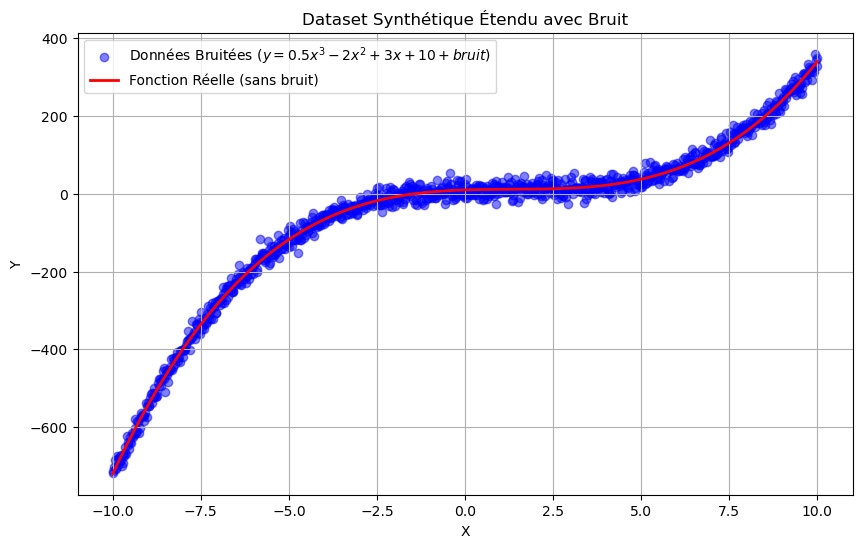

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# --- Paramètres de génération ---
N_SAMPLES = 1000           
NOISE_LEVEL = 15
RANDOM_SEED = 42


np.random.seed(RANDOM_SEED)

# Étendre la plage de X pour couvrir plus de valeurs
X = np.linspace(-10, 10, N_SAMPLES).reshape(-1, 1)  

# Fonction réelle (sans bruit)
y_true = 0.5 * X**3 - 2 * X**2 + 3 * X + 10

# Ajouter du bruit gaussien
bruit = np.random.normal(0, NOISE_LEVEL, N_SAMPLES).reshape(-1, 1)
y_bruit = y_true + bruit
y = y_bruit.ravel()  # Convertir en vecteur 1D

# 2️⃣ Séparer les données en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED)

# 3️⃣ Visualisation initiale
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Données Bruitées ($y=0.5x^3 - 2x^2 + 3x + 10 + bruit$)', color='blue', alpha=0.5)
plt.plot(X, y_true, label='Fonction Réelle (sans bruit)', color='red', linewidth=2)
plt.title('Dataset Synthétique Étendu avec Bruit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

Ridge Regression:
  MSE = 215.972
  R²  = 0.995

Lasso Regression:
  MSE = 216.008
  R²  = 0.995



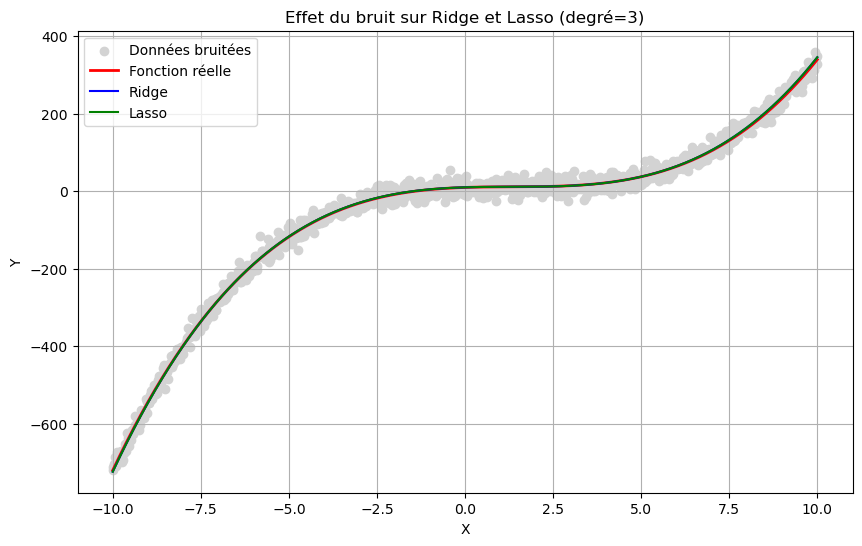

In [25]:
# ===== Q2: Effet du bruit sur Ridge et Lasso =====
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# --- Ridge et Lasso sur données bruitées ---
ridge = make_pipeline(PolynomialFeatures(3), Ridge(alpha=0.1))
lasso = make_pipeline(PolynomialFeatures(3), Lasso(alpha=0.1, max_iter=10000))

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Prédictions
y_pred_ridge = ridge.predict(X)
y_pred_lasso = lasso.predict(X)

# Scores
print("Ridge Regression:")
print(f"  MSE = {mean_squared_error(y, y_pred_ridge):.3f}")
print(f"  R²  = {r2_score(y, y_pred_ridge):.3f}\n")

print("Lasso Regression:")
print(f"  MSE = {mean_squared_error(y, y_pred_lasso):.3f}")
print(f"  R²  = {r2_score(y, y_pred_lasso):.3f}\n")

plt.figure(figsize=(10,6))
plt.scatter(X.ravel(), y, color='lightgray', label='Données bruitées')
plt.plot(X.ravel(), 0.5*X.ravel()**3 - 2*X.ravel()**2 + 3*X.ravel() + 10, color='red', linewidth=2, label='Fonction réelle')
plt.plot(X.ravel(), y_pred_ridge, color='blue', label='Ridge')
plt.plot(X.ravel(), y_pred_lasso, color='green', label='Lasso')
plt.title("Effet du bruit sur Ridge et Lasso (degré=3)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()



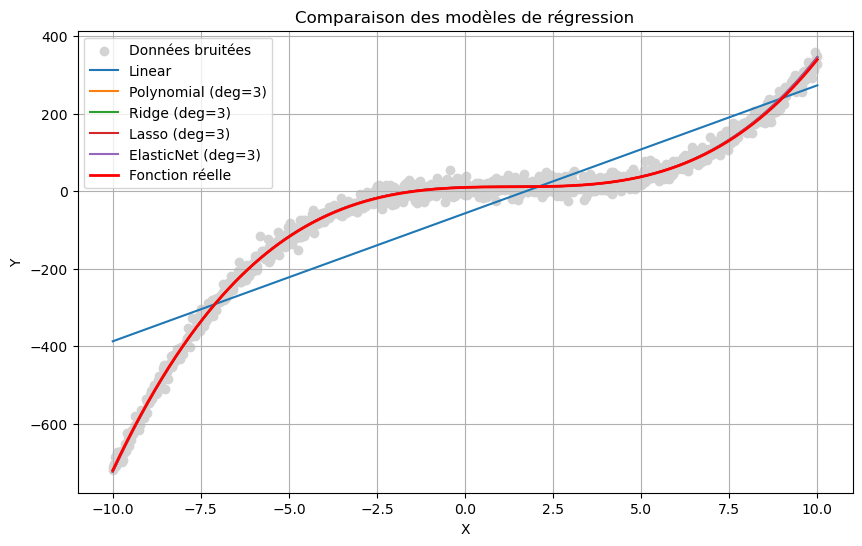

               Modèle           MSE        R²
0              Linear  10017.943293  0.792800
1  Polynomial (deg=3)    223.466910  0.995378
2       Ridge (deg=3)    223.516550  0.995377
3       Lasso (deg=3)    223.583155  0.995376
4  ElasticNet (deg=3)    223.697584  0.995373


In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

models = {
    "Linear": LinearRegression(),
    "Polynomial (deg=3)": make_pipeline(PolynomialFeatures(3), LinearRegression()),
    "Ridge (deg=3)": make_pipeline(PolynomialFeatures(3), Ridge(alpha=10)),
    "Lasso (deg=3)": make_pipeline(PolynomialFeatures(3), Lasso(alpha=0.1, max_iter=10000)),
    "ElasticNet (deg=3)": make_pipeline(PolynomialFeatures(3), ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000))
}

plt.figure(figsize=(10,6))
plt.scatter(X, y, color='lightgray', label='Données bruitées')

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, mse, r2))
    
    plt.plot(X, model.predict(X), label=name)

plt.plot(X, 0.5*X**3 - 2*X**2 + 3*X + 10, color='red', linewidth=2, label='Fonction réelle')
plt.title("Comparaison des modèles de régression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

# Résumé des scores
import pandas as pd
df_results = pd.DataFrame(results, columns=["Modèle", "MSE", "R²"])
print(df_results)

=== Coefficients des modèles ===
     Polynomial     Ridge     Lasso  ElasticNet
1      0.000000  0.000000  0.000000    0.000000
x      2.757711  2.750342  2.740541    2.724162
x^2   -1.991487 -1.991460 -1.991384   -1.991338
x^3    0.507160  0.507264  0.507402    0.507634


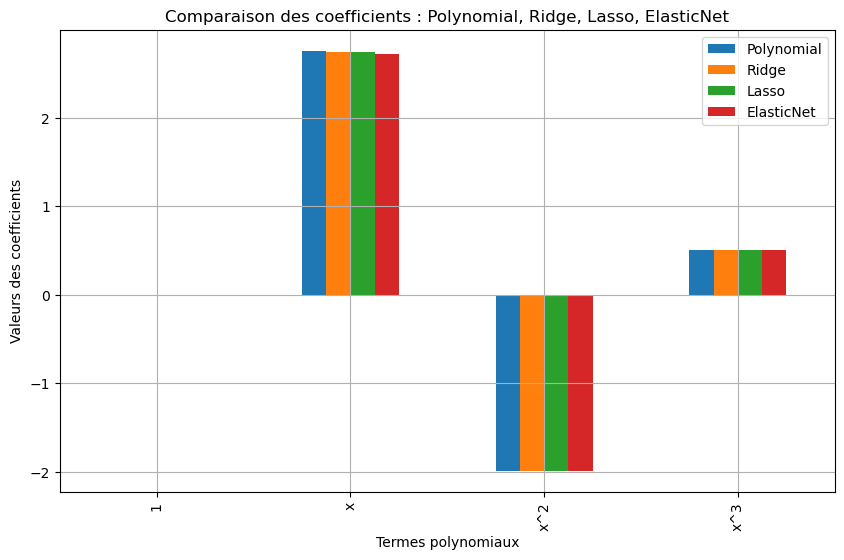

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# --- Re-train all polynomial-based models (degree = 3) ---
models_poly = {
    "Polynomial": make_pipeline(PolynomialFeatures(3), LinearRegression()),
    "Ridge": make_pipeline(PolynomialFeatures(3), Ridge(alpha=10)),
    "Lasso": make_pipeline(PolynomialFeatures(3), Lasso(alpha=0.1, max_iter=10000)),
    "ElasticNet": make_pipeline(PolynomialFeatures(3), ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000))
}

for name, model in models_poly.items():
    model.fit(X_train, y_train)

# --- Get feature names properly ---
poly_features = PolynomialFeatures(degree=3)
poly_features.fit(X_train)  
feature_names = poly_features.get_feature_names_out(['x'])


# --- Extract coefficients ---
coefs = {}
for name, model in models_poly.items():
    if 'linearregression' in model.named_steps:
        coefs[name] = model.named_steps['linearregression'].coef_
    elif 'ridge' in model.named_steps:
        coefs[name] = model.named_steps['ridge'].coef_
    elif 'lasso' in model.named_steps:
        coefs[name] = model.named_steps['lasso'].coef_
    elif 'elasticnet' in model.named_steps:
        coefs[name] = model.named_steps['elasticnet'].coef_

# --- Build DataFrame for visualization ---
coef_df = pd.DataFrame(coefs, index=feature_names)
print("=== Coefficients des modèles ===")
print(coef_df)

# --- Plot coefficients comparison ---
coef_df.plot(kind='bar', figsize=(10,6))
plt.title("Comparaison des coefficients : Polynomial, Ridge, Lasso, ElasticNet")
plt.xlabel("Termes polynomiaux")
plt.ylabel("Valeurs des coefficients")
plt.grid(True)
plt.show()


In [5]:
# Cell A: imports & preprocessing utils
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import random
import os

# Fixer la reproductibilité (gardera un comportement plus stable)
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

# Standardiser les features (important pour NN)
scaler_x = StandardScaler()
scaler_y = StandardScaler()

# Si train_x est un DataFrame, convertir en numpy
X_train = np.asarray(X_train)
X_test  = np.asarray(X_test)
y_train = np.asarray(y_train).reshape(-1, 1)
y_test  = np.asarray(y_test).reshape(-1, 1)

# Fit scaler on train only
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled  = scaler_x.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train)  # si target très grande, helps training
y_test_scaled  = scaler_y.transform(y_test)

print("Shapes:", X_train_scaled.shape, y_train_scaled.shape, X_test_scaled.shape, y_test_scaled.shape)

Shapes: (700, 1) (700, 1) (300, 1) (300, 1)


In [6]:
# Cell B: fonction de construction de modèle
def build_regressor(input_dim, activation='tanh', hidden_units=[64, 32], lr=1e-3):
    """
    activation: 'tanh', 'relu', 'leakyrelu', etc.
    hidden_units: liste des tailles de couches cachées
    """
    inp = layers.Input(shape=(input_dim,))
    x = inp

    for units in hidden_units:
        x = layers.Dense(units)(x)
        if activation.lower() == 'leakyrelu':
            x = layers.LeakyReLU(alpha=0.1)(x)
        else:
            x = layers.Activation(activation)(x)

    # Couche de sortie pour régression (une seule sortie, linéaire)
    out = layers.Dense(1, activation='linear')(x)

    model = models.Model(inputs=inp, outputs=out)
    model.compile(optimizer=optimizers.Adam(learning_rate=lr),
                  loss='mse',
                  metrics=['mse'])
    return model

# Quick test build
_m = build_regressor(input_dim=X_train_scaled.shape[1], activation='tanh')
_m.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 1)             │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense (Dense)                 │ (None, 64)            │          128 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ activation (Activation)       │ (None, 64)            │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 32)            │        2,080 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ activation_1 (Activation)     │ (None, 32)            │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_2 (Dense)               │ (None, 1)             │           33 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 2,241 (8.75 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)



=== Activation: tanh ===

Restoring model weights from the end of the best epoch: 10.
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
tanh -> Test MSE: 4449.9901, Test R2: 0.9080


=== Activation: leakyrelu ===



C:\Users\OMEN\miniconda3\envs\regression_env\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Restoring model weights from the end of the best epoch: 10.
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
leakyrelu -> Test MSE: 274.2839, Test R2: 0.9943


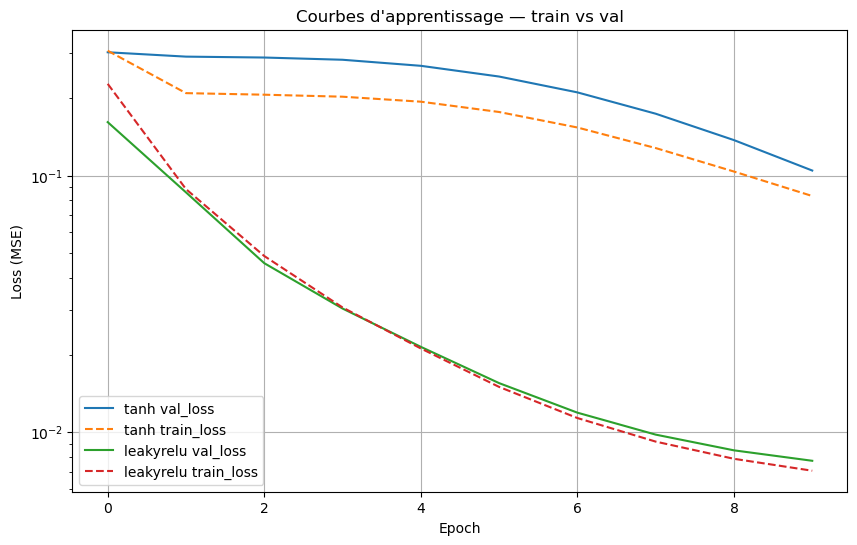

,Test MSE,Test R2
tanh,4449.990055,0.907961
leakyrelu,274.283896,0.994327



Meilleur activation selon R2: leakyrelu
Shape des poids première couche: (1, 128)
min, mean, max of first layer weights: -0.23802282 -0.0009382237 0.23310378


In [9]:
# Cell C: entraînement comparatif
activations = ['tanh', 'leakyrelu']   # tu peux ajouter 'relu' etc.
histories = {}
results = {}

EPOCHS = 10
BATCH = 8

es = callbacks.EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True, verbose=1)

for act in activations:
    print("\n\n=== Activation:", act, "===\n")
    model = build_regressor(input_dim=X_train_scaled.shape[1],
                            activation=act,
                            hidden_units=[128, 64],  # tu peux changer
                            lr=1e-3)
    history = model.fit(
        X_train_scaled, y_train_scaled,
        validation_split=0.2,
        epochs=EPOCHS,
        batch_size=BATCH,
        callbacks=[es],
        verbose=0  # mettre 1 pour voir les epoch
    )
    histories[act] = history
    # Prédictions (on dé-scales)
    y_pred_scaled = model.predict(X_test_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1)).ravel()
    y_true = y_test.ravel()
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    results[act] = {'model': model, 'mse': mse, 'r2': r2}
    print(f"{act} -> Test MSE: {mse:.4f}, Test R2: {r2:.4f}")

# --- Tracer les courbes d'entraînement (loss) pour comparaison
plt.figure(figsize=(10,6))
for act, h in histories.items():
    plt.plot(h.history['val_loss'], label=f'{act} val_loss')
    plt.plot(h.history['loss'], linestyle='--', label=f'{act} train_loss')
plt.yscale('log')  # souvent mieux pour voir l'évolution; retires si tu préfères linear
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Courbes d\'apprentissage — train vs val')
plt.legend()
plt.grid(True)
plt.show()

# --- Afficher les métriques en tableau simple
import pandas as pd
df_results = pd.DataFrame({k: {'Test MSE': v['mse'], 'Test R2': v['r2']} for k, v in results.items()}).T
display(df_results)

# --- (Optionnel) Inspecter les poids de la première couche du meilleur modèle
best_act = max(results.keys(), key=lambda k: results[k]['r2'])  # selon R2
best_model = results[best_act]['model']
first_layer_weights = best_model.layers[1].get_weights()[0]  # matrice poids de la 1ere Dense
print(f"\nMeilleur activation selon R2: {best_act}")
print("Shape des poids première couche:", first_layer_weights.shape)
# Afficher statistique sommaire des poids
print("min, mean, max of first layer weights:", np.min(first_layer_weights), np.mean(first_layer_weights), np.max(first_layer_weights))


In [10]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load California housing dataset
california = fetch_california_housing(as_frame=True)
X = california.data
y = california.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("California housing dataset loaded.")
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

California housing dataset loaded.
Train shape: (16512, 8), Test shape: (4128, 8)


In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Define models
models_dict = {
    "Linear": LinearRegression(),
    "Polynomial (degree 3)": make_pipeline(PolynomialFeatures(3), LinearRegression()),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01, max_iter=5000),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=5000)
}

results = {}

# Train and evaluate each model
for name, model in models_dict.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}
    print(f"{name} -> Test MSE: {mse:.4f}, Test R2: {r2:.4f}")

# Display results in a table
import pandas as pd
df_results = pd.DataFrame(results).T
display(df_results)




Linear -> Test MSE: 0.5559, Test R2: 0.5758
Polynomial (degree 3) -> Test MSE: 25.4071, Test R2: -18.3887
Ridge -> Test MSE: 0.5559, Test R2: 0.5758
Lasso -> Test MSE: 0.5483, Test R2: 0.5816
ElasticNet -> Test MSE: 0.5500, Test R2: 0.5803


,MSE,R2
Linear,0.555892,0.575788
Polynomial (degree 3),25.407137,-18.388708
Ridge,0.555855,0.575816
Lasso,0.548255,0.581615
ElasticNet,0.549953,0.580319


C:\Users\OMEN\miniconda3\envs\regression_env\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step
                   MSE        R2
Linear        0.555892  0.575788
Ridge         0.555888  0.575791
Lasso         0.679629  0.481361
ElasticNet    1.044231  0.203126
ANN (Custom)  0.291554  0.777509


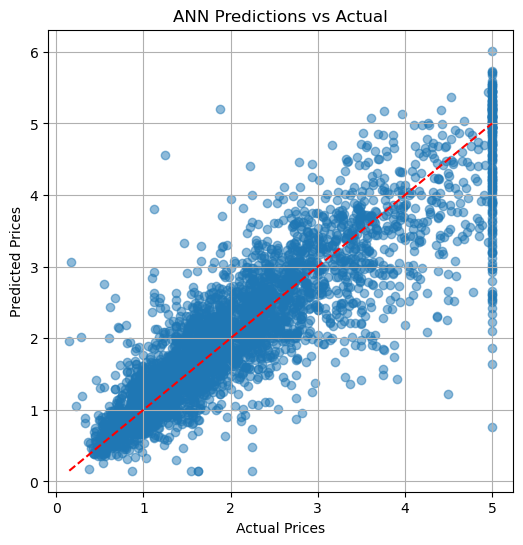

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras import layers, models, optimizers, callbacks
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras import callbacks
# --- Load and preprocess dataset ---
california = fetch_california_housing(as_frame=True)
X = california.data
y = california.target


# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale input features (X)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scale target (y) to [0, 1] for ReLU output
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))
# --- Define your ANN function ---
def build_regressor(input_dim, activation='tanh', hidden_units=[64, 32], lr=1e-3):
    inp = layers.Input(shape=(input_dim,))
    x = inp
    for units in hidden_units:
        x = layers.Dense(units)(x)
        if activation.lower() == 'leakyrelu':
            x = layers.LeakyReLU(alpha=0.1)(x)
        else:
            x = layers.Activation(activation)(x)
    out = layers.Dense(1, activation='relu')(x)
    model = models.Model(inputs=inp, outputs=out)
    model.compile(optimizer=optimizers.Adam(learning_rate=lr),
                  loss='mse',
                  metrics=['mse'])
    return model

es = callbacks.EarlyStopping(
    monitor='val_loss',    # metric to monitor
    patience=12,           # how many epochs to wait before stopping
    restore_best_weights=True,  # revert to the best model
    verbose=1
)

# --- Train traditional regressions ---
models_sklearn = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=0.1),
    "Lasso": Lasso(alpha=0.1, max_iter=1000),
    "ElasticNet": ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=1000)
}

results = {}

for name, model in models_sklearn.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        "MSE": mean_squared_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred)
    }

# --- Train ANN ---
es = callbacks.EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)
ann_model = build_regressor(input_dim=X_train_scaled.shape[1],
                            activation='leakyrelu',
                            hidden_units=[128, 64],
                            lr=1e-3)

history = ann_model.fit(
    X_train_scaled, y_train_scaled,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[es],
    verbose=0
)

y_pred_scaled = ann_model.predict(X_test_scaled)
y_pred_ann = scaler_y.inverse_transform(y_pred_scaled).ravel()

results["ANN (Custom)"] = {
    "MSE": mean_squared_error(y_test, y_pred_ann),
    "R2": r2_score(y_test, y_pred_ann)
}

# --- Display results ---
df_results = pd.DataFrame(results).T
print(df_results)

# Optional: Plot predicted vs actual for ANN
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_ann, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("ANN Predictions vs Actual")
plt.grid(True)
plt.show()